Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Load the dataset & Display basic information

In [2]:
heart_df = pd.read_csv(r"heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_df.shape

(1025, 14)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Handling Missing Data & Duplicates

In [8]:
heart_df.duplicated().sum()

723

In [9]:
heart_df.drop_duplicates(inplace=True)

In [10]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

EDA

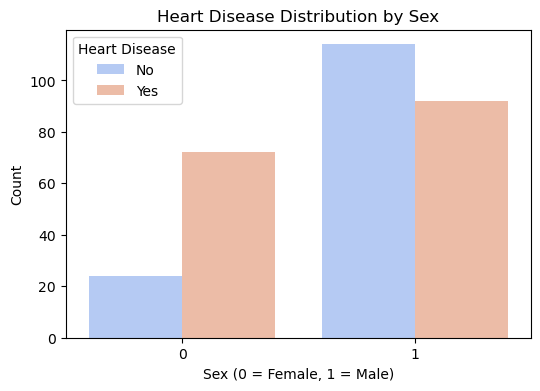

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="target", data=heart_df, palette="coolwarm")
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

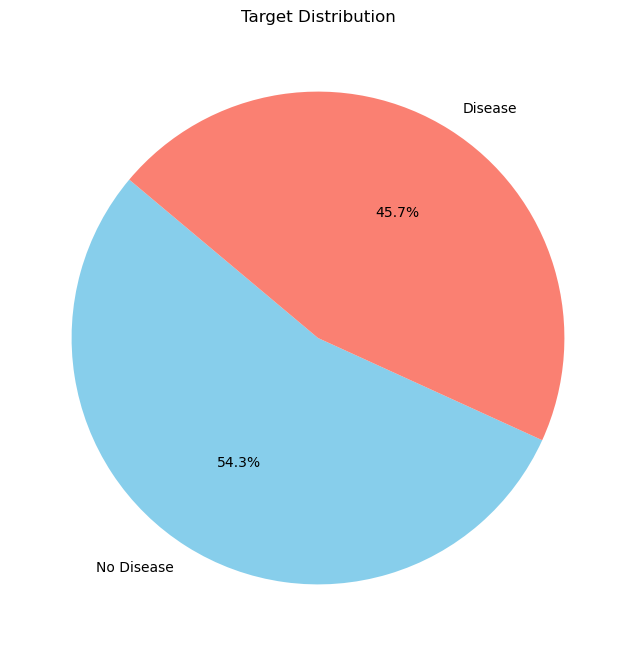

In [12]:
target_counts = heart_df["target"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["No Disease", "Disease"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Target Distribution")
plt.show() 

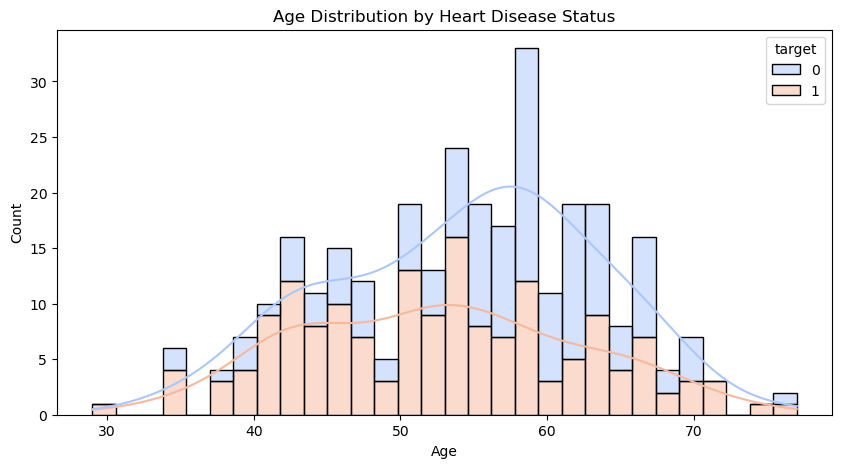

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=heart_df, x="age", hue="target", multiple="stack", bins=30, palette="coolwarm", kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

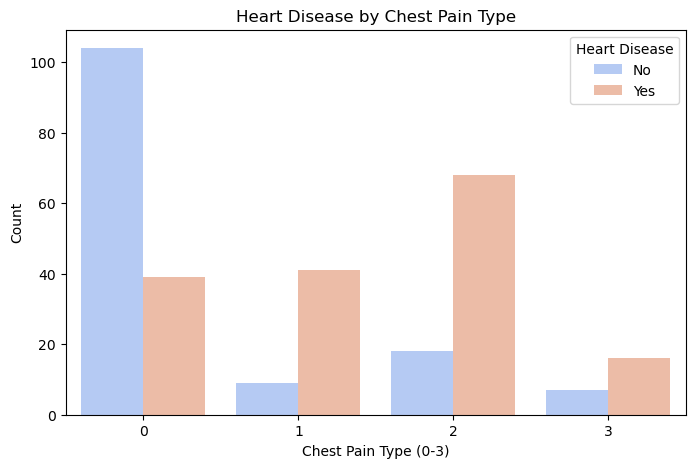

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x="cp", hue="target", data=heart_df, palette="coolwarm")
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


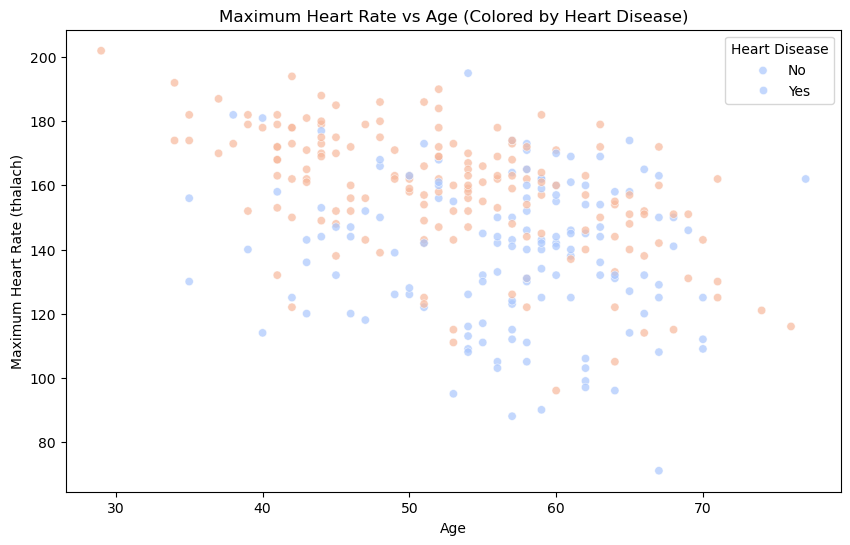

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="thalach", hue="target", data=heart_df, palette="coolwarm", alpha=0.7)
plt.title("Maximum Heart Rate vs Age (Colored by Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


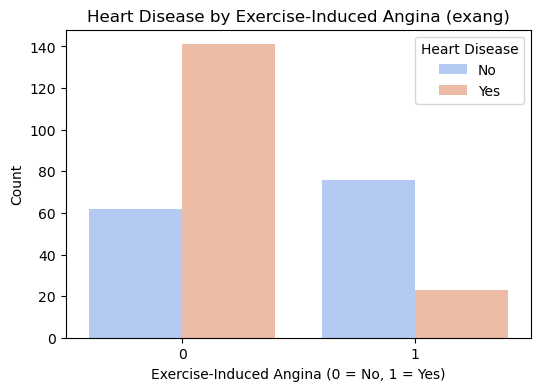

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="exang", hue="target", data=heart_df, palette="coolwarm")
plt.title("Heart Disease by Exercise-Induced Angina (exang)")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


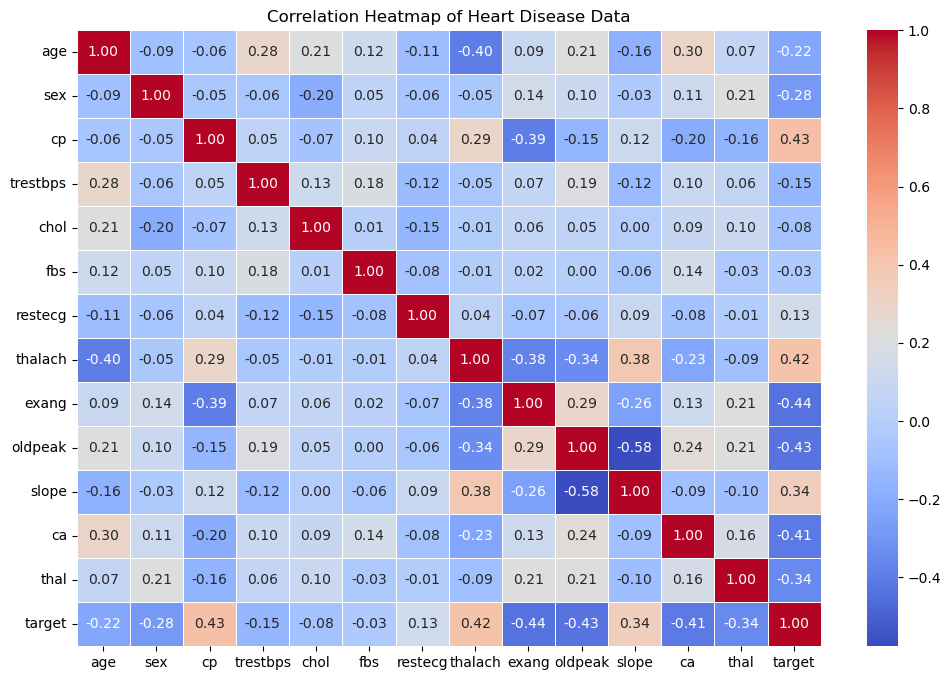

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Heart Disease Data")
plt.show()

Preprocessing

In [18]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [19]:
index_list=[]
for feature in ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']:
    index_list.extend(outliers(heart_df,feature))

In [20]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df
heart_df=remove(heart_df,index_list)

In [21]:
# checking the distribution of Target Variable
heart_df['target'].value_counts()

target
1    132
0     96
Name: count, dtype: int64

In [22]:
#Splitting the Features and Target
x = heart_df.drop(columns='target', axis=1)
y = heart_df['target']

In [23]:
#Scalling
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
# print shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (159, 13)
Testing Features Shape: (69, 13)
Training Target Shape: (159,)
Testing Target Shape: (69,)


Modeling

In [26]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GaussianNB': GaussianNB()
}

In [27]:
# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f'Accuracy of {name}: {accuracy:.4f}')

Accuracy of Logistic Regression: 0.8261
Accuracy of Decision Tree: 0.8116
Accuracy of Random Forest: 0.8261
Accuracy of SVC: 0.8116
Accuracy of Gradient Boosting: 0.8261
Accuracy of AdaBoost: 0.7971
Accuracy of GaussianNB: 0.7536


C:\Users\hp\AppData\Local\Temp\ipykernel_5552\1901461713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


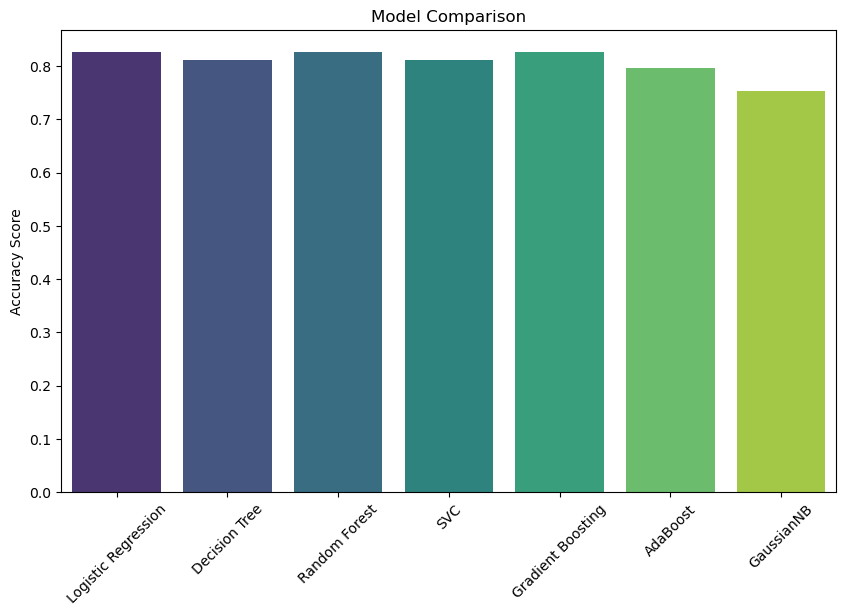

In [28]:
# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

In [29]:
# Choose best model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
heart_model = models[best_model_name]
heart_model.fit(X_train, y_train)
print(f'Best Model: {best_model_name} with Accuracy: {accuracy_scores[best_model_name]:.4f}')

Best Model: Logistic Regression with Accuracy: 0.8261


Building a Predictive System

In [30]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = heart_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
